In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

In [2]:
import yank.analyze as yk
import matplotlib as mt
from matplotlib import pyplot as plt
import matplotlib.pylab as pylab
import pandas as pnd
import mdtraj as md
import nglview as nv
import seaborn as sb
import numpy as np
import os

In [3]:
# Matplotlib options
%matplotlib inline
mt.style.use('ggplot')
pylab.rcParams['figure.figsize'] = 12, 8

In [4]:
os.chdir ('/DATA/projects/Testing_Yank/binding/t4-lysozyme/p-xylene-explicit-output/experiments/replica_trajectories')

In [5]:
ls

replica_0.h5   replica_13.h5  replica_19.h5  replica_24.h5  replica_8.h5
replica_0.nc   replica_14.h5  replica_2.h5   replica_3.h5   replica_9.h5
replica_1.h5   replica_15.h5  replica_20.h5  replica_4.h5
replica_10.h5  replica_16.h5  replica_21.h5  replica_5.h5
replica_11.h5  replica_17.h5  replica_22.h5  replica_6.h5
replica_12.h5  replica_18.h5  replica_23.h5  replica_7.h5


In [6]:
n_replica= np.arange (25)
for i in n_replica:
    index=str(input('Insert a replica number, is a int from 0 to 24:'))
    if isinstance (index, str):
            replica=('replica_'+index+'.h5')
            load_replica= md.load_hdf5 (replica)
            print (load_replica, 'number_of_replica:',index)
            break
    else: 
            print ('This is not a valid replica number, try another')
            
view= nv.show_mdtraj (load_replica) #Shows the selected replica
view.clear_representations ()
view.add_ball_and_stick (selection='MOL', color='red', aspectRatio='10')
view.add_cartoon (selection="protein")
view

Insert a replica number, is a int from 0 to 24:0
<mdtraj.Trajectory with 500 frames, 2629 atoms, 171 residues, and unitcells> number_of_replica: 0


NGLWidget(count=500)

In [7]:
traj={} #dictionary to create each replica as variable
n_replica= np.arange (25)
for i in n_replica:
    index=str(i)
    load=('replica_'+index+'.h5')
    trayectories=traj['{0}'.format(i)]= md.load_hdf5 (load)

0


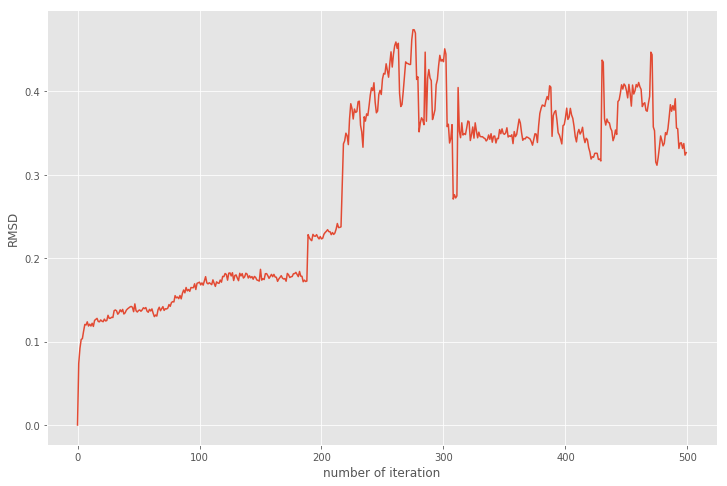

1


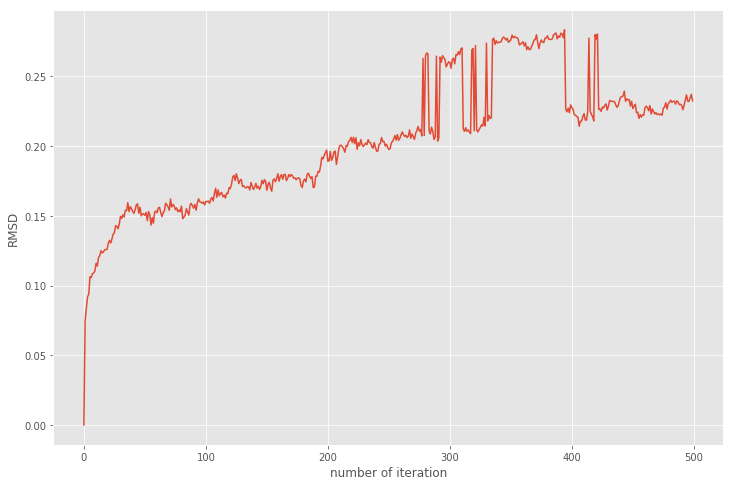

2


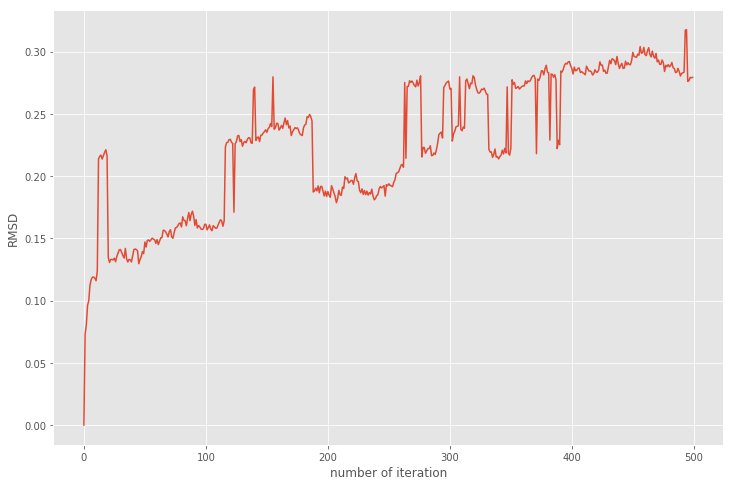

3


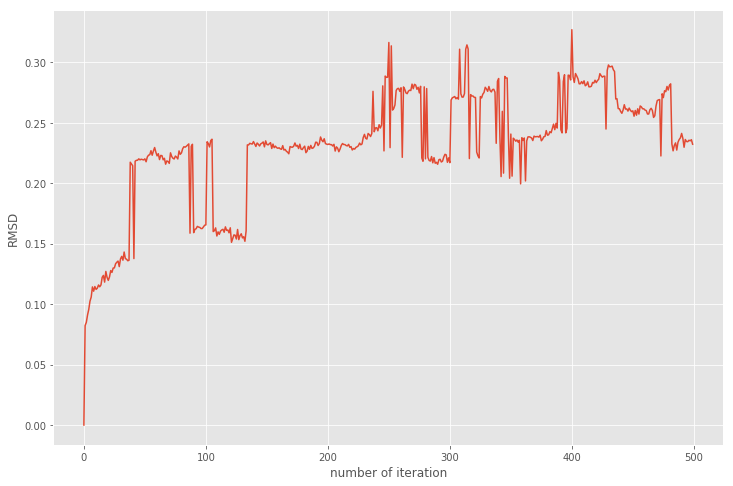

4


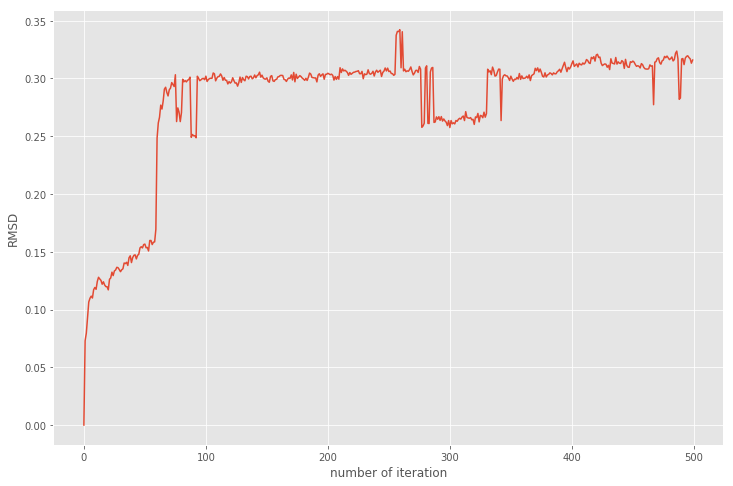

5


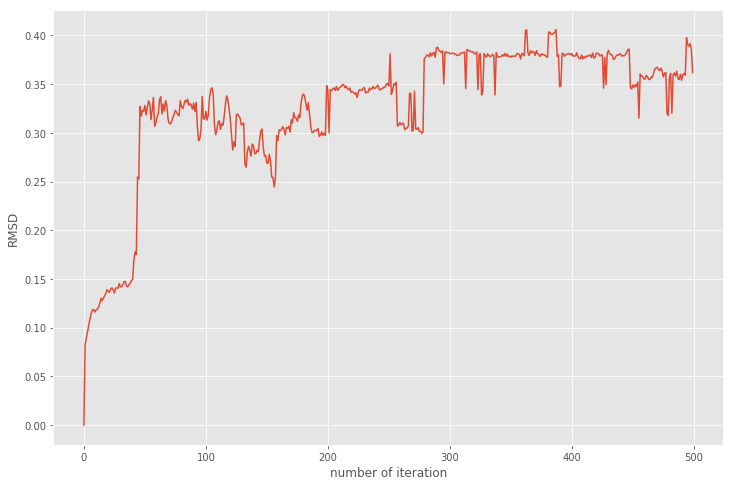

6


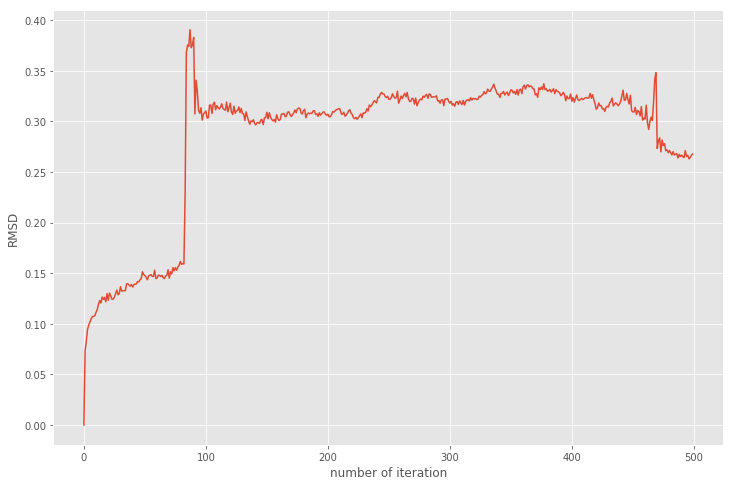

7


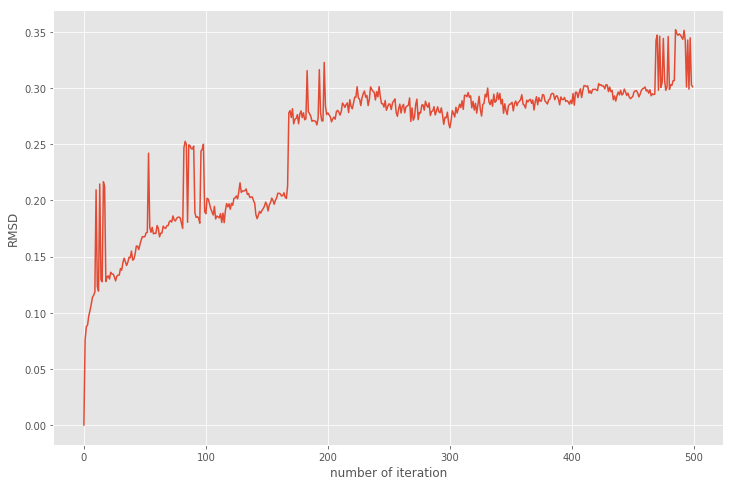

8


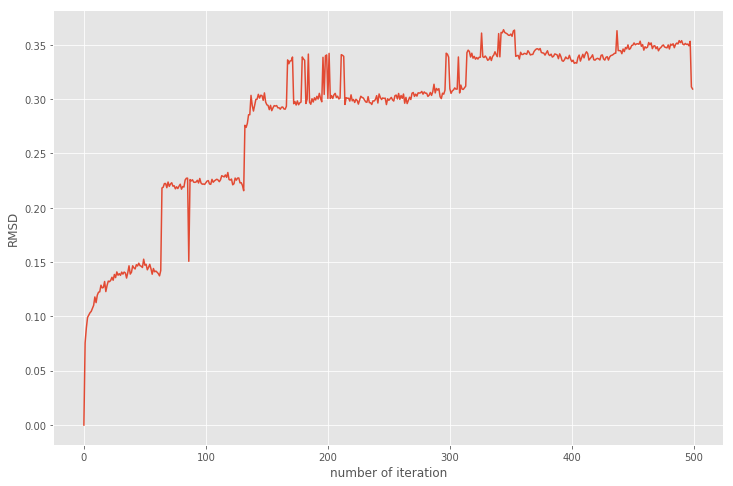

9


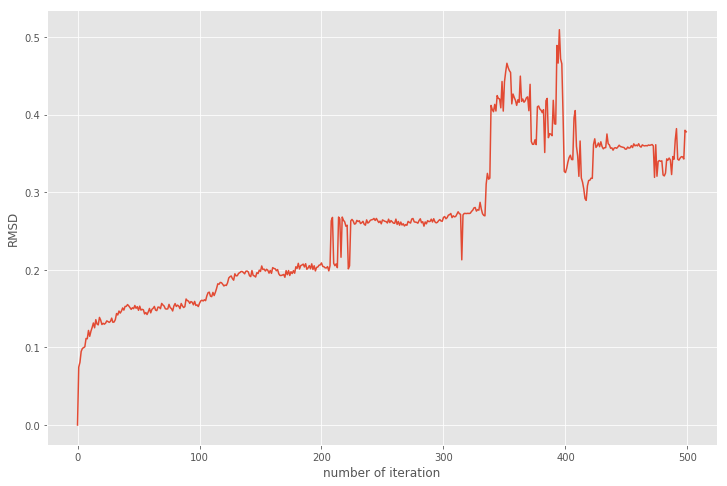

10


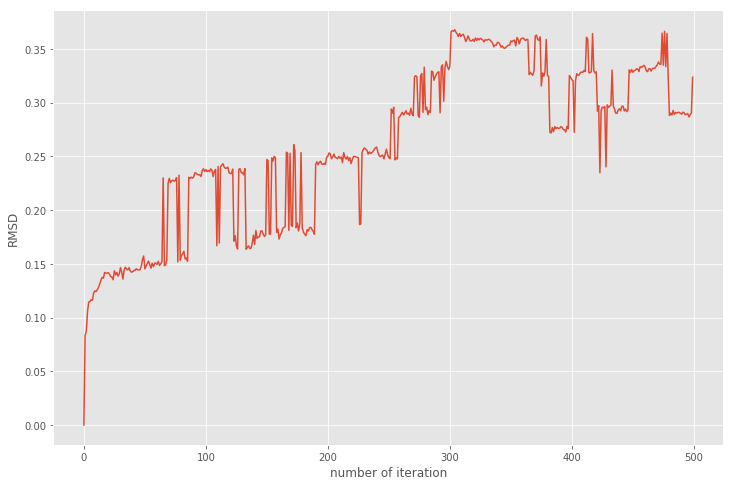

11


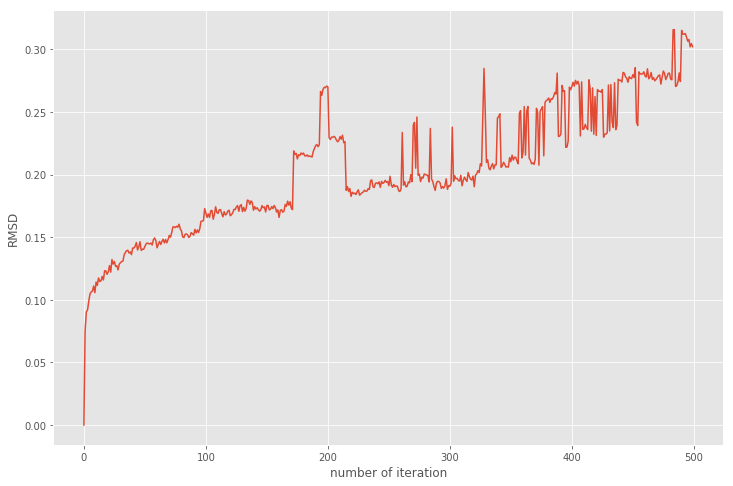

12


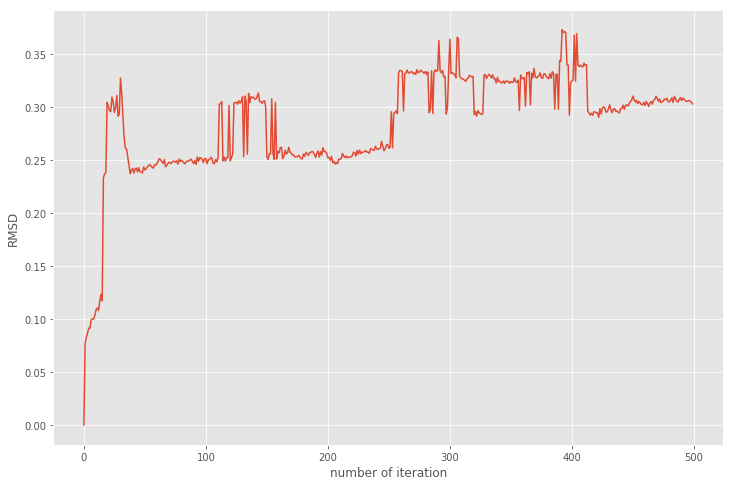

13


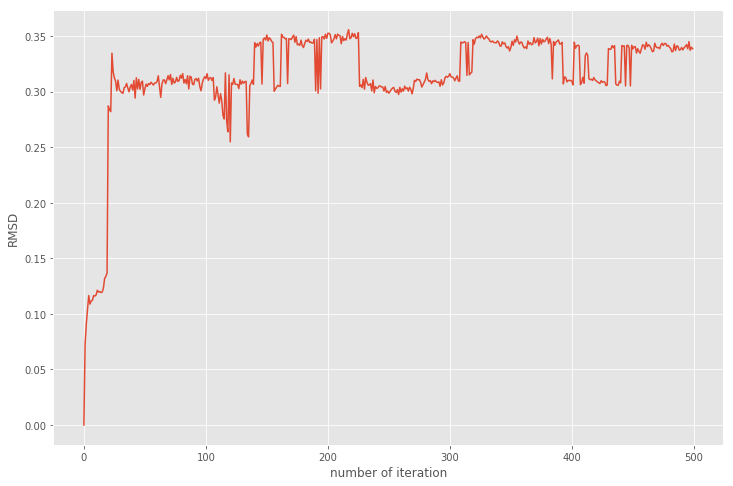

14


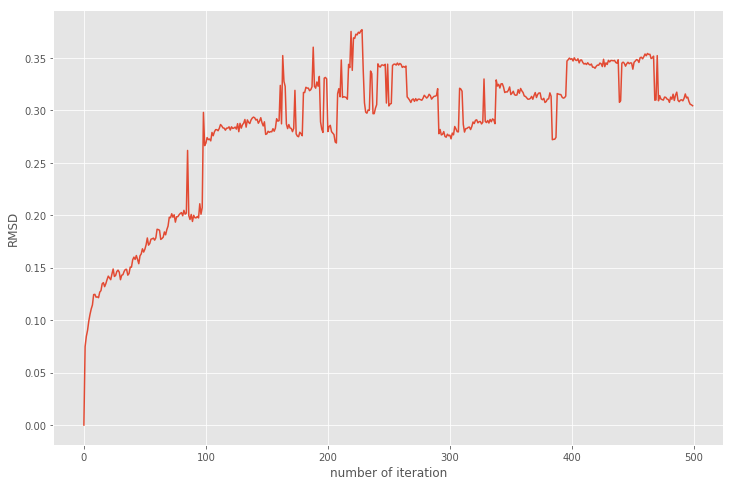

15


16


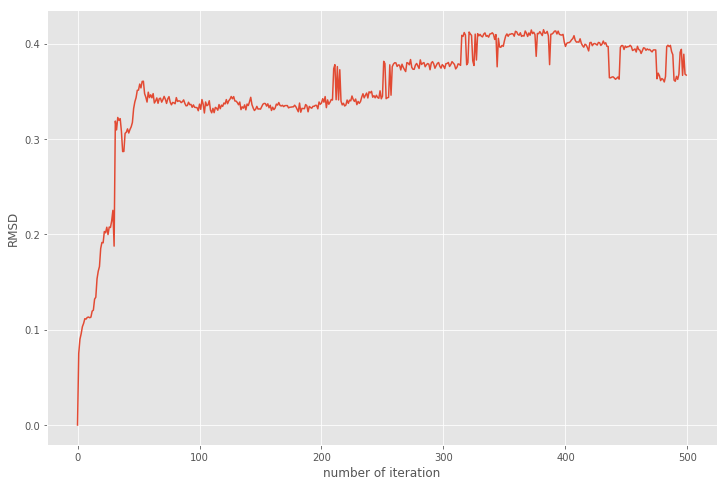

17


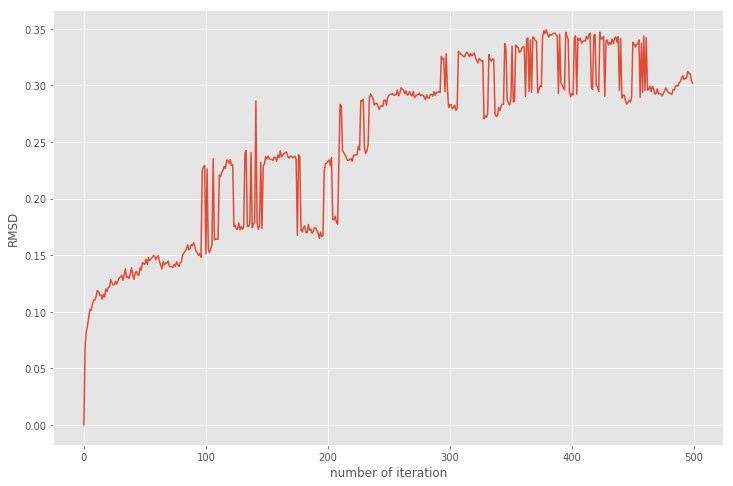

18


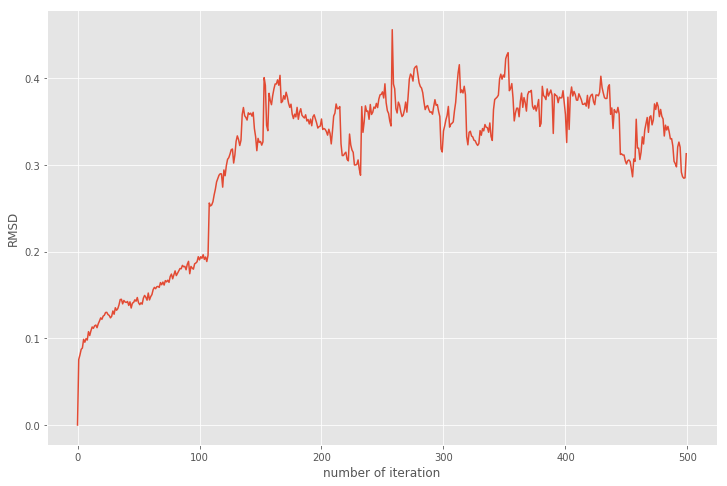

19


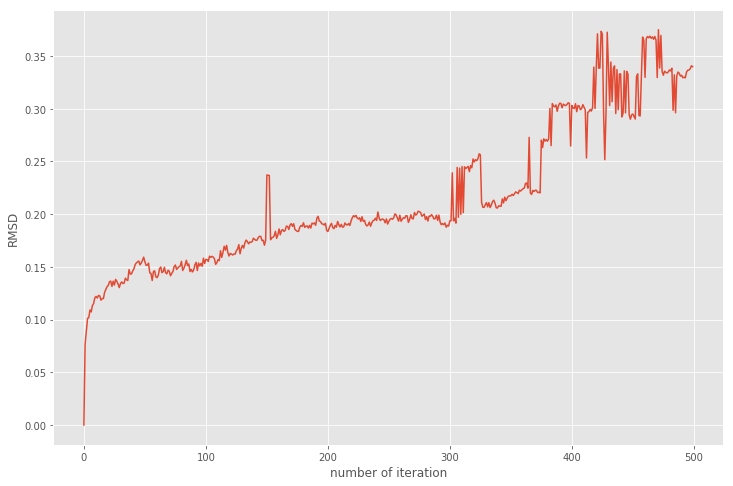

20


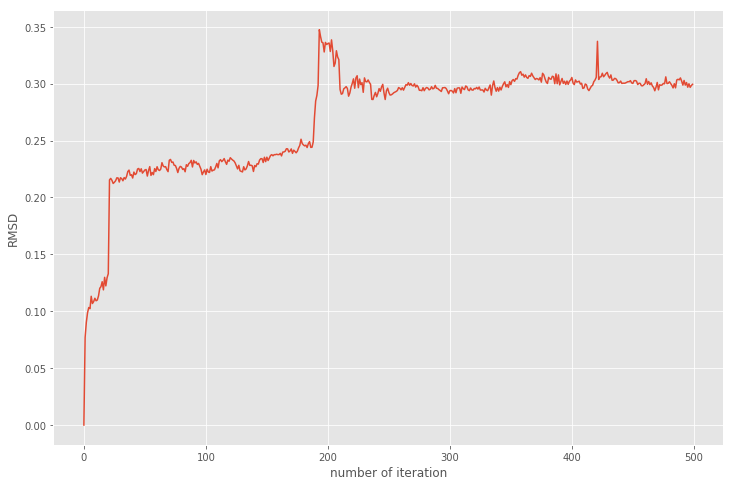

21


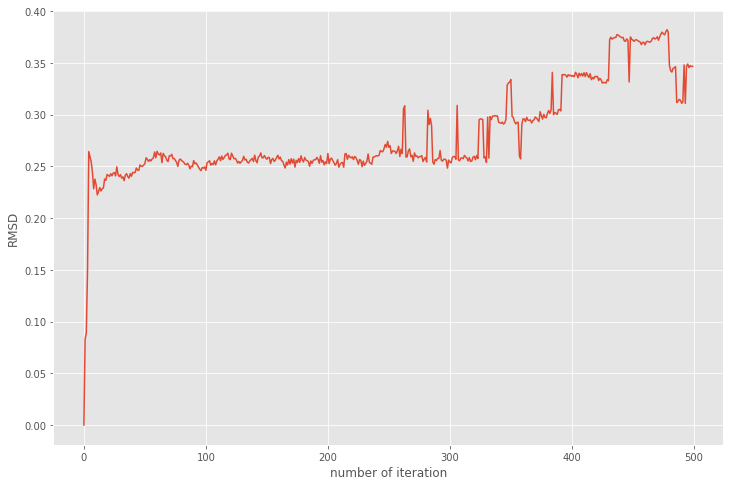

22


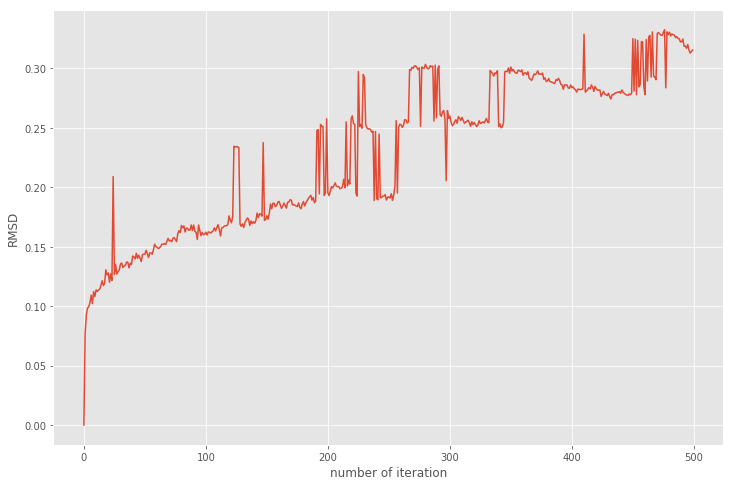

23


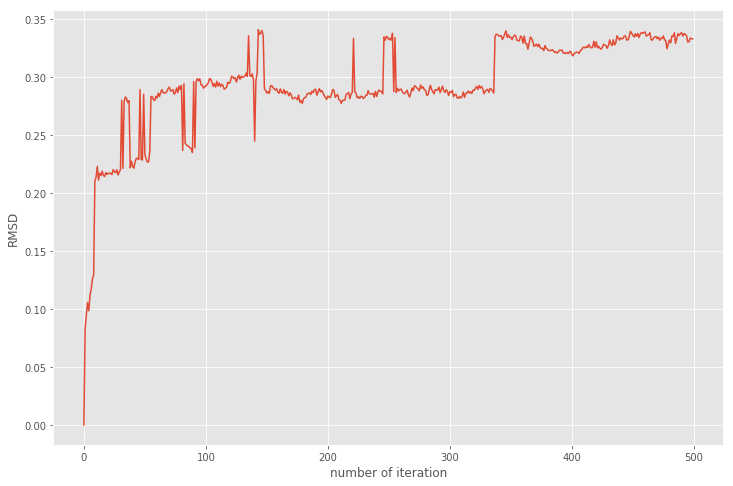

24


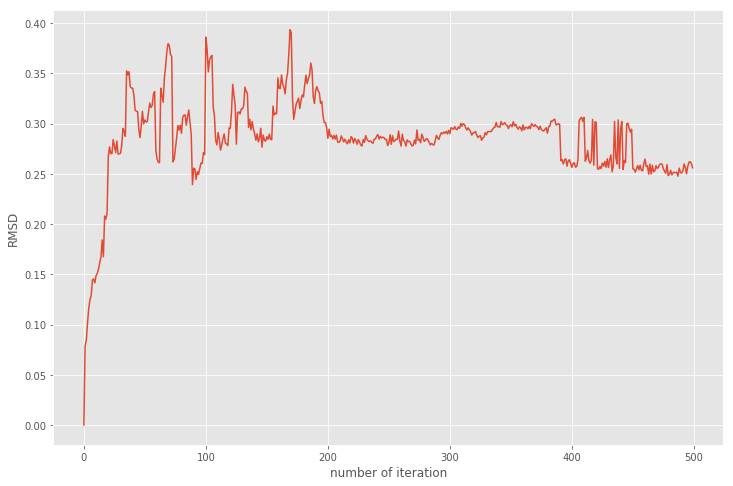

In [24]:
size=range (len(p_xylene))
for element in size:
    index=str(element)
    rmsd=md.rmsd (traj[index],traj[index],precentered=False)
    print (element)
    fig= plt.subplot ()
    plt.plot(rmsd)
    plt.xlabel("number of iteration")
    plt.ylabel("RMSD")
    plt.show()

In [8]:
p_xylene={} #dictionary to create p-xylene trayectories for each replica
n_replica= np.arange (25)
for i in n_replica:
    index=str(i)
    load=('replica_'+index+'.h5')
    trayectories=p_xylene['{0}'.format(i)]= md.load_hdf5 (load,atom_indices=[2603,2604,2605,2606,2607,2608,2609,2610,2611,2612,2613,2614,2615,2616,2617,2618,2619,2620])

0


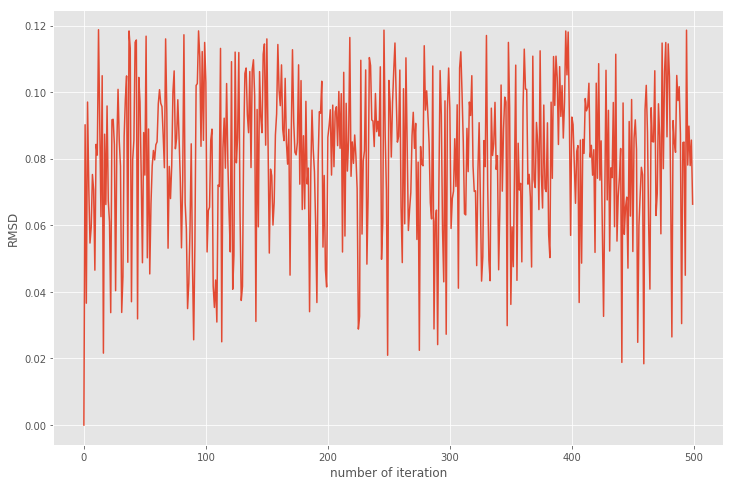

1


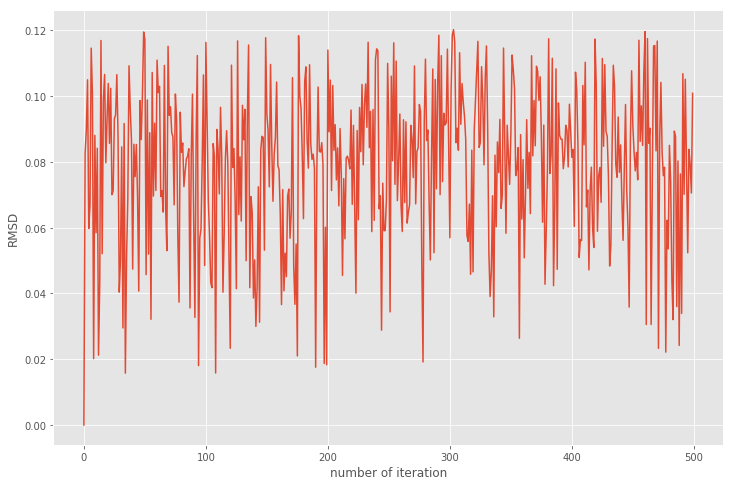

2


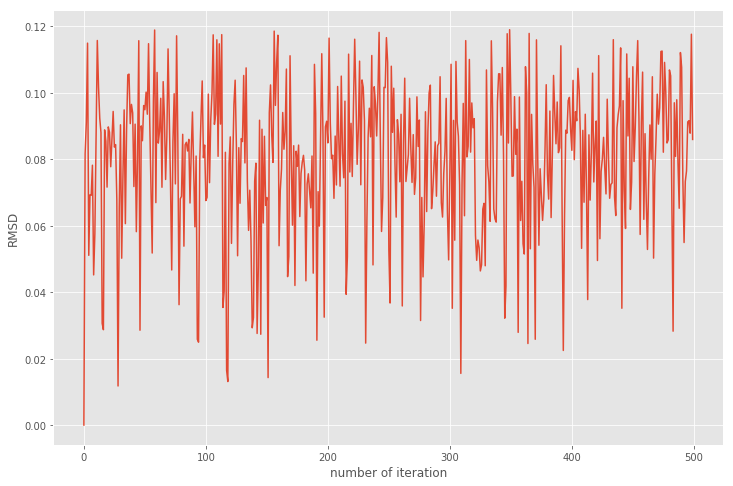

3


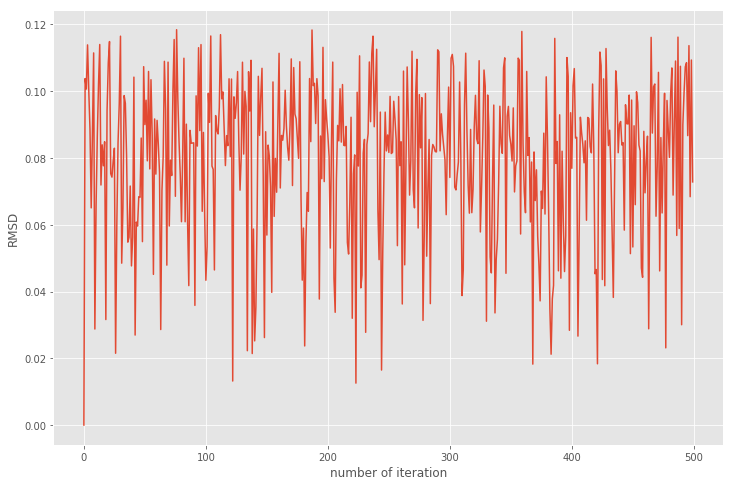

4


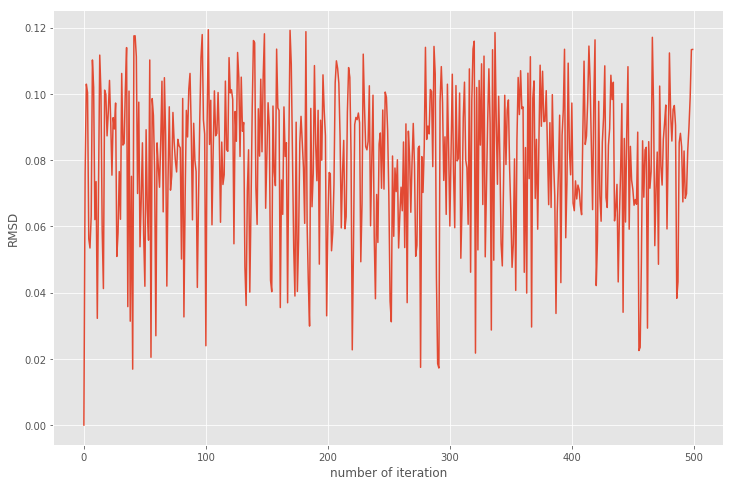

5


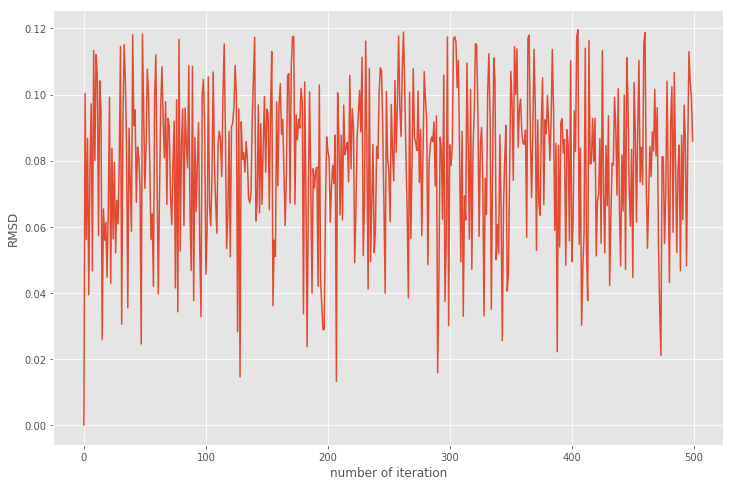

6


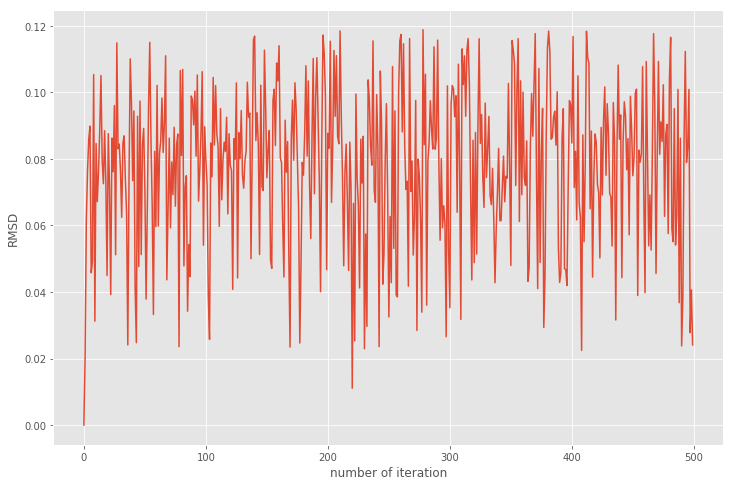

7


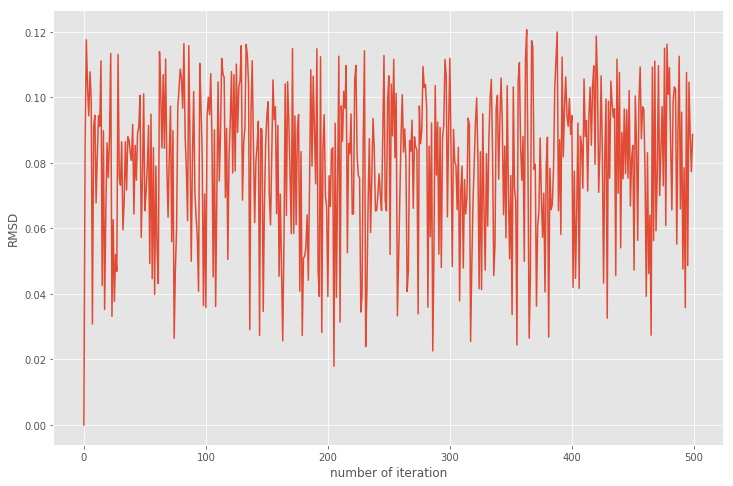

8


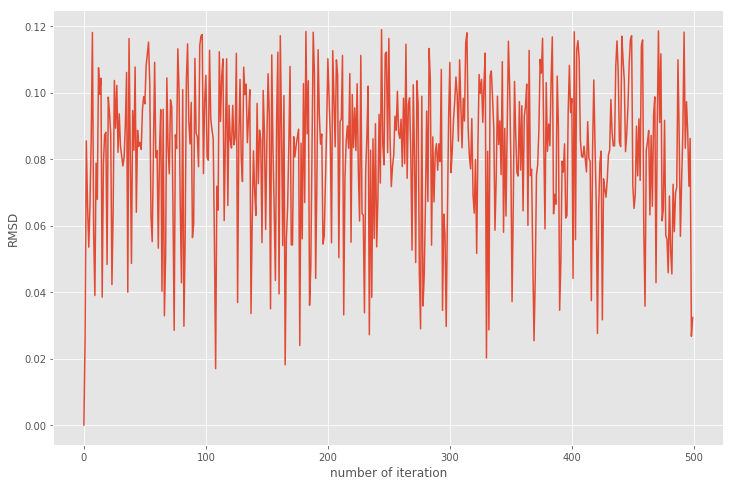

9


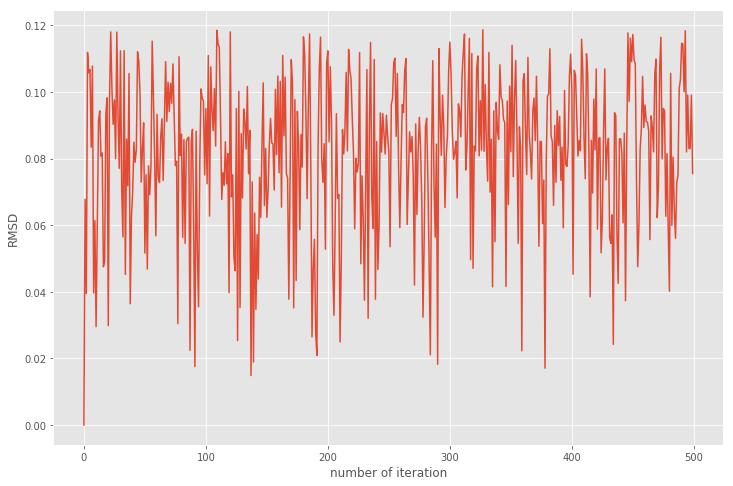

10


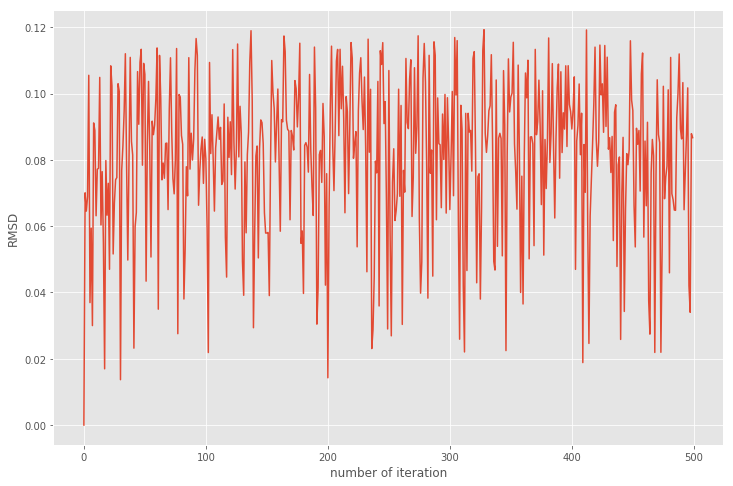

11


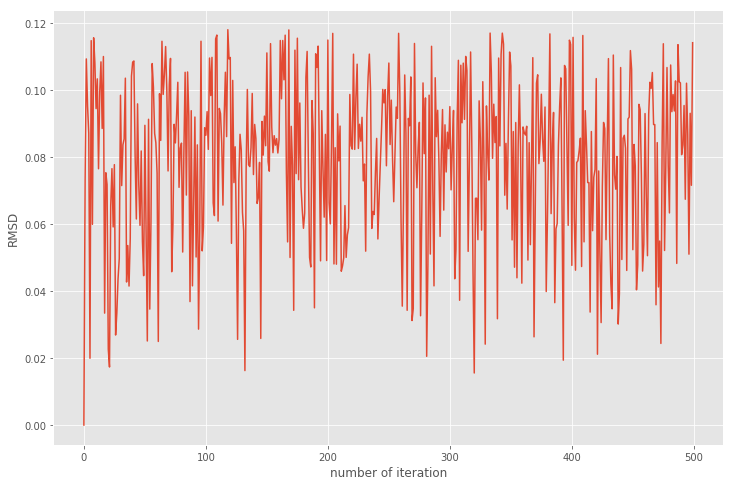

12


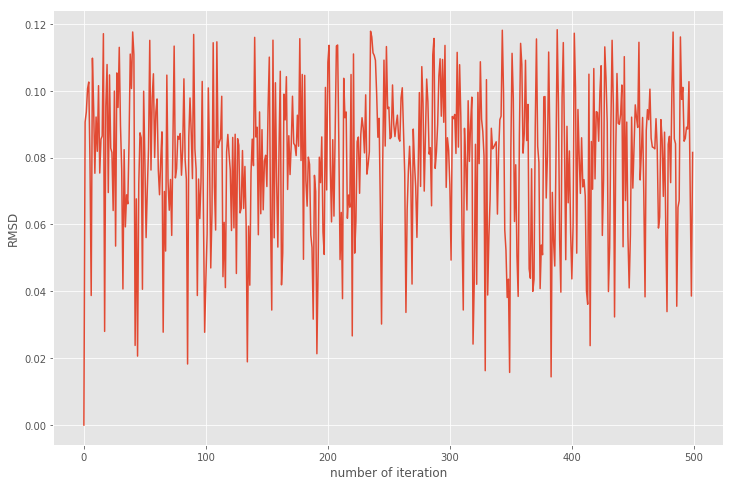

13


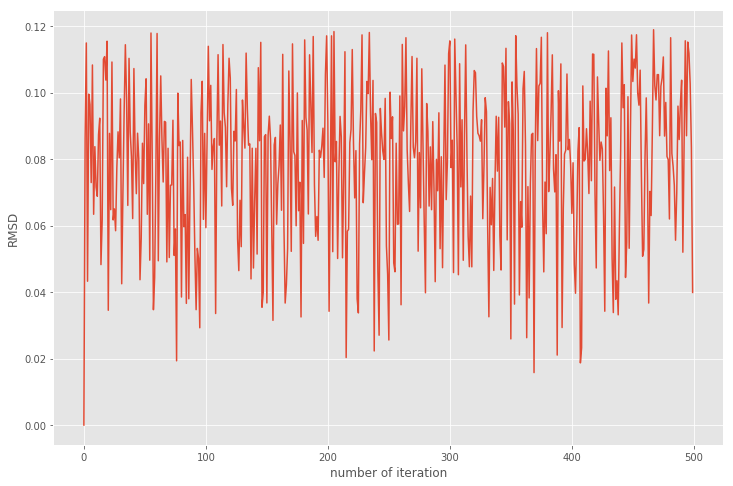

14


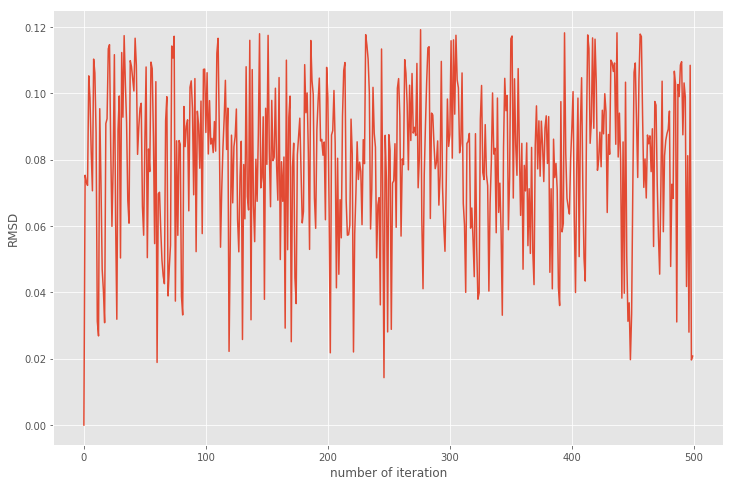

15


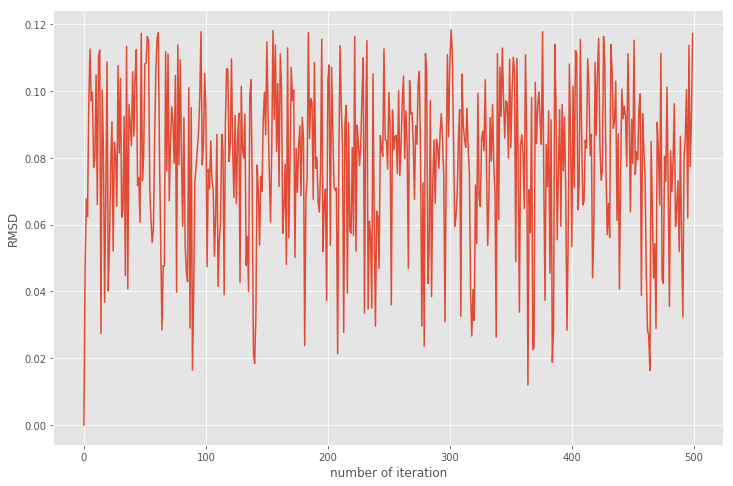

16


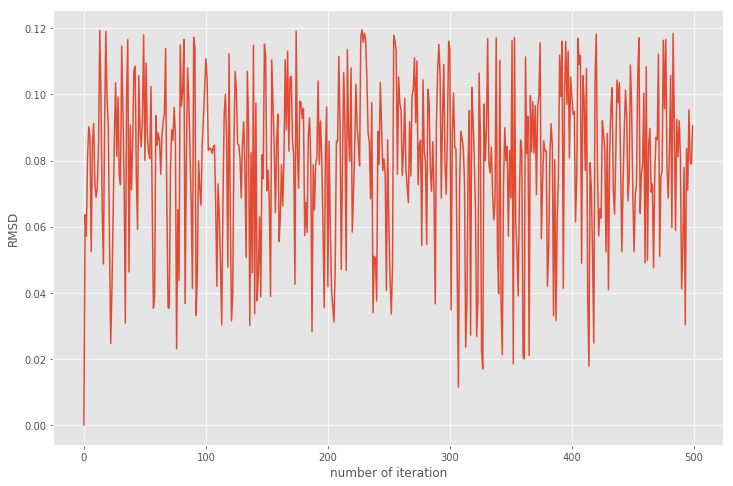

17


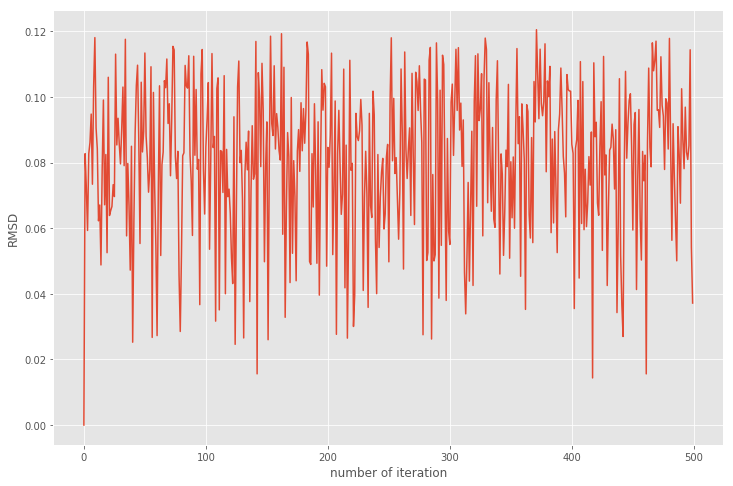

18


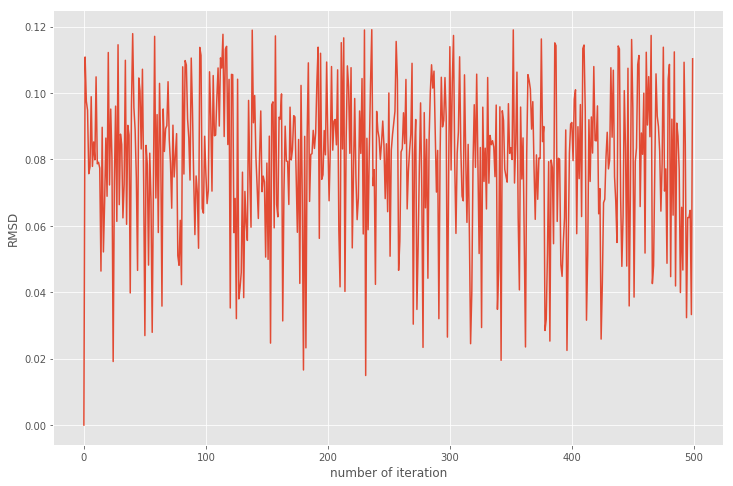

19


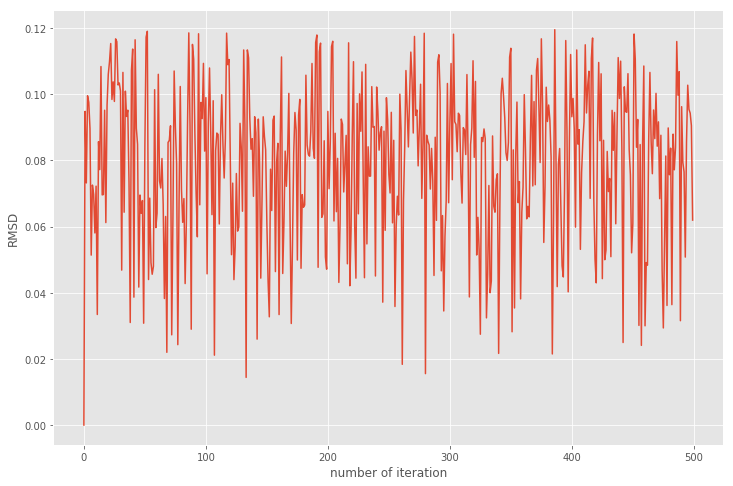

20


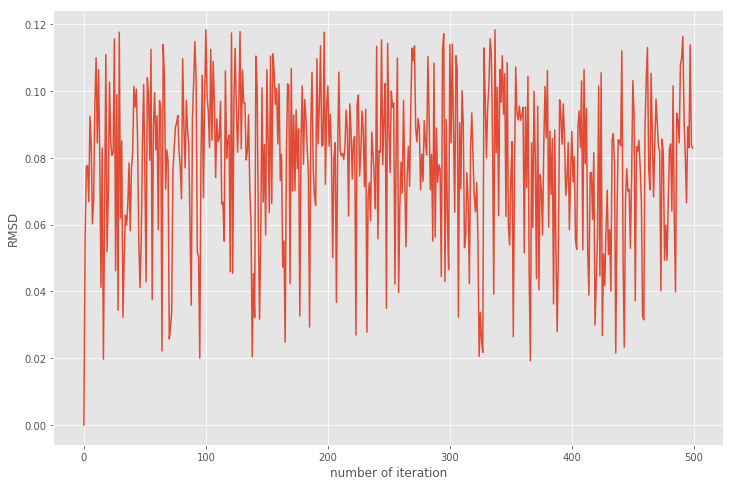

21


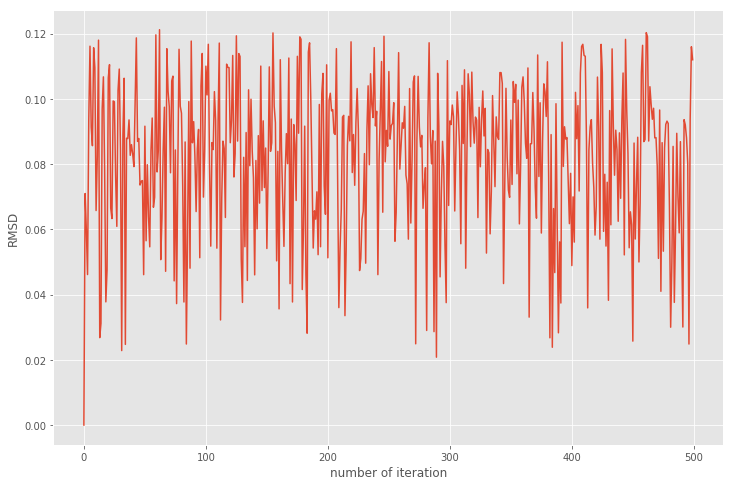

22


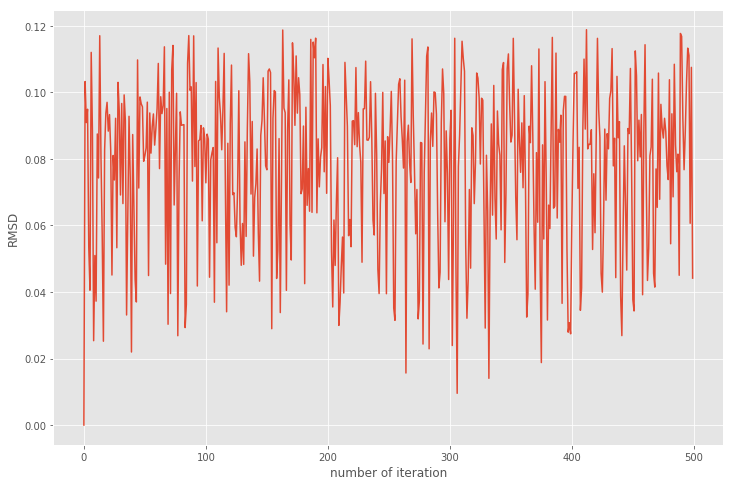

23


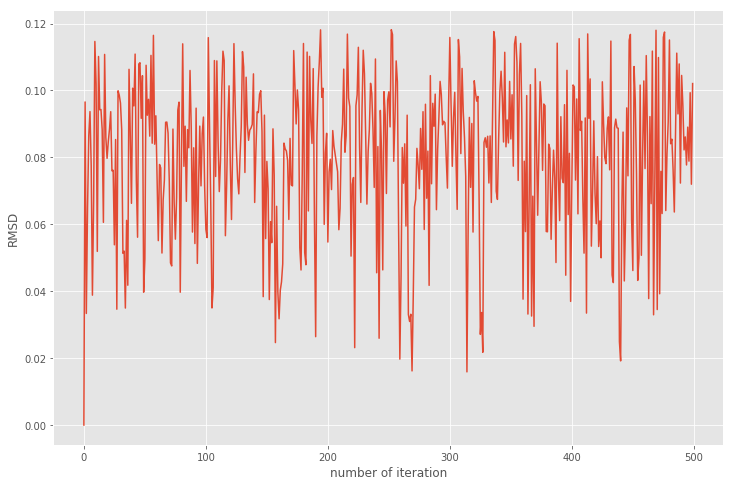

24


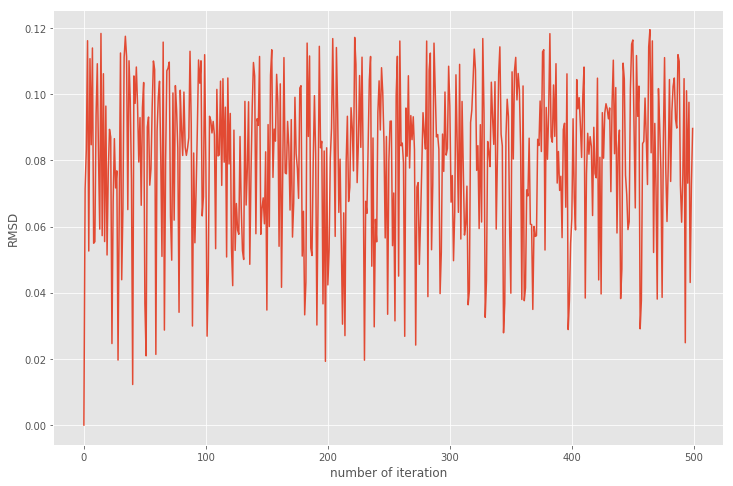

In [15]:
size=range (len(p_xylene))
for element in size:
    index=str(element)
    rmsd=md.rmsd (p_xylene[index],p_xylene[index],precentered=False)
    print (element)
    fig= plt.subplot ()
    plt.plot(rmsd)
    plt.xlabel("number of iteration")
    plt.ylabel("RMSD")
    plt.show()